In [1]:
%reset -f
#import numpy as np
from numpy import pi as np_pi
from numpy import load as np_load
from numpy import nditer as np_nditer
from numpy import size as np_size
from numpy import where as np_where
from numpy import nanmean as np_nanmean
from numpy import shape as np_shape
from numpy import reshape as np_reshape
from numpy import exp as np_exp
from numpy import cos as np_cos
from numpy import sin as np_sin
from numpy import empty as np_empty
from numpy import full as np_full
from numpy import linspace as np_linspace
from numpy import arange as np_arange
from numpy import multiply as np_multiply
from numpy import matmul as np_matmul
from numpy import round as np_round
from numpy import max as np_max
from numpy import min as np_min
from numpy import maximum as np_maximum
from numpy import argmax as np_argmax
from numpy import convolve as np_convolve
from numpy import sum as np_sum
from numpy import uint8 as np_uint8
from numpy import nan as np_nan
from numpy import isnan as np_isnan
from numpy import float32 as np_float32

import matplotlib.pyplot as plt
kernelsize = 15
sigma = 3

In [2]:
kernelsize = 15
sigma = 3
array = (np_arange(kernelsize)-kernelsize/2+0.5)
gaussian_kernel = np_exp(-array**2/(2*sigma**2))#*1/np_sqrt(2*np_pi*sigma**2)
gaussian_kernel /= np_sum(gaussian_kernel)
gaussian_reshaped = np_reshape( gaussian_kernel , [-1,1] )
gaussian2D = np_matmul( gaussian_reshaped , gaussian_reshaped.T )
del gaussian_reshaped

In [27]:
def gaussian_filter(IMG):
    for ind in range(np_size(IMG,0)):
        IMG[ind,:] = np_convolve( IMG[ind,:] , gaussian_kernel ,'same')
    for ind in range(np_size(IMG,1)):
        IMG[:,ind] = np_convolve( IMG[:,ind] , gaussian_kernel ,'same')
    return IMG

def find_maxima_peak(redIMG):
    dim = np_shape(redIMG)
    maxima = np_full(dim[0],np_nan, dtype=np_float32)
    for iii in range(0,dim[0]):
        index = np_argmax(redIMG[iii,:])
        if index != 0:
            maxima[iii] = index
    return maxima

def processing(redIMG):
    #gaussian blurr
    redIMG = gaussian_filter(redIMG)
    #threshold image
    threshold = 0.2#*np_max(redIMG)
    thresholded = np_multiply(redIMG,redIMG>threshold)
    #find maxima with gaussian function (fit)
#    maxima = find_maxima_gauss(thresholded)
    maxima = find_maxima_peak(thresholded)
    #remove outliners
    dim = np_shape(redIMG)
    window = dim[1]//10 #max horizontal step
    w=20 #window size
    for p in range(len(maxima)-w):
        av = np_nanmean(maxima[p:p+w]) #average position inside window
        if (maxima[p+w//2] - av) > window:
            maxima[p+w//2] = np_nan
    return maxima

def clip0(img):
    return np_maximum(img,0)

def scale(img):
    maxi = np_max(img)
    mini = np_min(img)
    return (img-mini)/(maxi-mini)

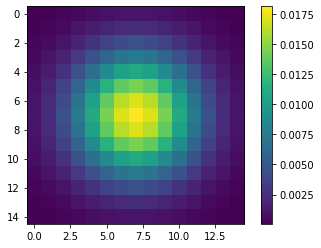

In [28]:
np_sum(gaussian2D)
plt.imshow( gaussian2D )
plt.colorbar()
plt.show()

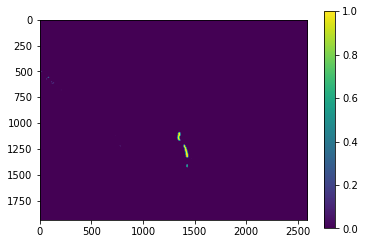

In [26]:
plt.imshow(redIMG>0.2)
plt.colorbar()

In [33]:
np_arange(np_size(maxima))

array([   0,    1,    2, ..., 1933, 1934, 1935])

In [29]:
IMG = plt.imread('./scan_images/img_r_036.jpg')
redIMG = scale(clip0(IMG[:,:,0] - (IMG[:,:,1]+IMG[:,:,2])/2))
maxima = processing(redIMG)

<ipython-input-27-453b5043b162>:31: RuntimeWarning: Mean of empty slice
  av = np_nanmean(maxima[p:p+w]) #average position inside window


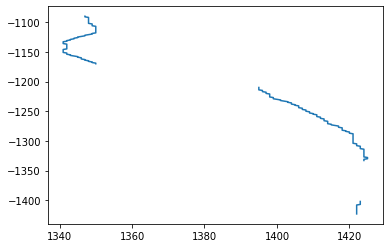

In [35]:
plt.plot(maxima,-np_arange(np_size(maxima)))